# Titanic Dataset

1. Load Dataset

	•Load the Titanic dataset using seaborn or pandas.

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df=sns.load_dataset('titanic')
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
x = df[(df['survived'] == True) & (df['embark_town'] == 'Southampton') & (df['age'] > 50)]

print(x)


     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
11          1       1  female  58.0      0      0   26.5500        S   First   
15          1       2  female  55.0      0      0   16.0000        S  Second   
268         1       1  female  58.0      0      1  153.4625        S   First   
275         1       1  female  63.0      1      0   77.9583        S   First   
449         1       1    male  52.0      0      0   30.5000        S   First   
483         1       3  female  63.0      0      0    9.5875        S   Third   
570         1       2    male  62.0      0      0   10.5000        S  Second   
571         1       1  female  53.0      2      0   51.4792        S   First   
630         1       1    male  80.0      0      0   30.0000        S   First   
765         1       1  female  51.0      1      0   77.9583        S   First   
774         1       2  female  54.0      1      3   23.0000        S  Second   
820         1       1  female  52.0     

2. Preprocess the Data

	•	Drop irrelevant columns (e.g., name, ticket, cabin).

	•	Handle missing values:

	•	Fill age with median.

	•	Drop rows with remaining nulls.
    
	•	Encode categorical variables using one-hot encoding.

In [5]:
df.drop(['sibsp','alone','who', 'deck', 'embark_town', 'alive','adult_male'],axis=1,inplace=True)

In [6]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5084\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [7]:
df.dropna(inplace=True)

In [8]:
df=pd.get_dummies(df,columns=['sex','embarked','class'],drop_first=True)

In [9]:
df.head()

,survived,pclass,age,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,0,7.2500,True,False,True,False,True
1,1,1,38.0,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,7.9250,False,False,True,False,True
3,1,1,35.0,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,8.0500,True,False,True,False,True


3. EDA

	•	Find and print survival rates based on passenger class.

	•	Create one insight (e.g., relation between fare/class and survival).

In [10]:
res=df.groupby('pclass')['survived'].sum()
print(res)

pclass
1    134
2     87
3    119
Name: survived, dtype: int64


In [11]:
fare_insight=df.groupby('survived')['fare'].mean()
print(fare_insight)

survived
0    22.117887
1    48.209498
Name: fare, dtype: float64


<Axes: xlabel='survived', ylabel='fare'>

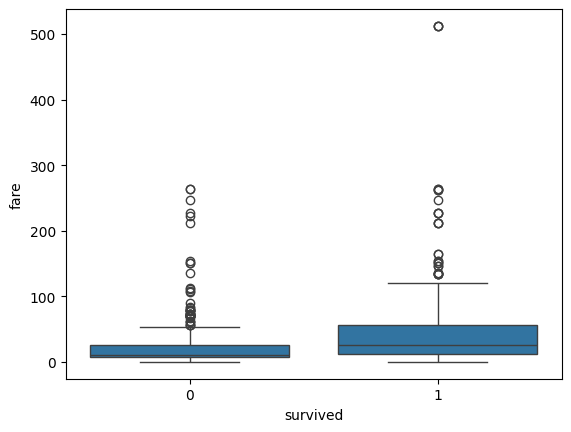

In [12]:
sns.boxplot(data=df,x='survived',y='fare')

4. Model Training

	•	Use logistic regression (or any other classifier).

	•	Apply vectorized operations (no loops).

	•	Train/test split (80/20).
    
	•	Print model accuracy.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #To avoid max iterartion


X=df.drop('survived',axis=1)
y=df['survived']
X_scaled=scaler.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)

print("Accuracy : ",accuracy)

Accuracy :  0.797752808988764
